# A brief study of Monte Carlo Integration Methods

In [1]:
#
# We start with studying a simple one-dimensional integral
# by using Monte Carlo Integration method.
# Then, we demonstrate Monte Carlo Method with the importance 
# sampling can reduce the error.
# 
# Finally, we study a multi-dim integral by using the packages 
# scikit-monaco and scipy integrate, respectively.
#

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Example of 1-dim integral

In [3]:
# int^1_0 x**2 dx

In [4]:
f = lambda x: x**2

In [5]:
def OneDim_MC_integration(x1,x2,f,n):
    X=np.linspace(x1,x2,10000)
    y1, y2 = min(f(X)), max(f(X))
    area = (x2-x1)*(y2-y1)
    x = np.random.uniform(x1, x2, n)
    y = np.random.uniform(y1, y2, n)
    return np.mean(y<f(x))*area

In [6]:
%precision 4

'%.4f'

In [7]:
N = 1000

In [8]:
% time print("Integral =",OneDim_MC_integration(0,1,f,N))

Integral = 0.33
Wall time: 2.01 ms


# Importance Sampling 

In [9]:
# We adopt the function g(x) for importance sampling.
# Consider
# g = 2x.
# We integrate the integral \int^1_0 f(x)/g(x) g(x)dx
#
# Inverse Tranform Sampling: to produce g(x)dx
# This can be made by finding the CDF, G(X) of g(x) and then
# using the inverse function of G(x) as a function of uniform
# distribution of a random variable

In [10]:
# f(x)/g(x)
fg = lambda x: x/2

In [11]:
def Importance_sampling_1D_MCI(x1,x2,fg,n):
    X=np.linspace(x1,x2,10000)
    y1, y2 = min(fg(X)), max(fg(X))
    area = (x2-x1)*(y2-y1)
    # Here x is the inverse transform sampling of g(x)dx
    x = np.sqrt(np.random.uniform(x1, x2, n))
    y = np.random.uniform(y1, y2, n)
    return np.mean(y<fg(x))*area

In [12]:
% time print("Integral =",Importance_sampling_1D_MCI(0,1,fg,N))

Integral = 0.3375
Wall time: 1.98 ms


In [13]:
#
# We compare the errors between Monte Carlo integration with and
# without importance sampling, where the error is defined as 
# sqrt((<f^2>-<f>^2)/N-1)

In [14]:
f2 = lambda x: f(x)**2

In [15]:
Ntrial = [1000,2500,5000,10000,20000,30000,40000,50000]
MC1 = np.zeros(len(Ntrial))
MCerr1 = np.zeros(len(Ntrial))
for i,N in enumerate(Ntrial):
    MC1[i] = OneDim_MC_integration(0,1,f,N)
    MCerr1[i] = np.sqrt((OneDim_MC_integration(0,1,f2,N)-MC1[i]**2)/(N-1))

In [16]:
print("Monte Carlo Integration without Importance Sampling:")
fmt = '{:<15}{:<10}'
print(fmt.format('Value','Error'))
for i in range(len(Ntrial)):
    print(fmt.format(np.round(MC1[i],4),np.round(MCerr1[i],8)))

Monte Carlo Integration without Importance Sampling:
Value          Error     
0.369          0.00899555
0.3224         0.006315  
0.338          0.0043675 
0.342          0.00294185
0.3332         0.00207503
0.3295         0.00172851
0.3339         0.00148602
0.3302         0.00132707


In [17]:
fg2 = lambda x: fg(x)**2

In [18]:
MC2 = np.zeros(len(Ntrial))
MCerr2 = np.zeros(len(Ntrial))
for i,N in enumerate(Ntrial):
    MC2[i] = Importance_sampling_1D_MCI(0,1,fg,N)
    MCerr2[i] = np.sqrt((Importance_sampling_1D_MCI(0,1,fg2,N)-MC2[i]**2)/(N-1))

In [19]:
print("Monte Carlo Integration with Importance Sampling:")
fmt = '{:<15}{:<10}'
print(fmt.format('Value','Error'))
for i in range(len(Ntrial)):
    print(fmt.format(np.round(MC2[i],4),np.round(MCerr2[i],8)))

Monte Carlo Integration with Importance Sampling:
Value          Error     
0.3155         0.00536083
0.336          0.0019807 
0.3337         0.0015998 
0.334          0.00110054
0.3325         0.0008614 
0.3347         0.0006581 
0.3337         0.00059431
0.3342         0.00050496


In [20]:
# Plot setting:
SIZE1 = 15
SIZE2 = 20
SIZE3 = 25

plt.rc('font', size=SIZE1)          # controls default text sizes
plt.rc('axes', titlesize=SIZE1)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE2)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE1)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE1)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE1)    # legend fontsize
plt.rc('figure', titlesize=SIZE3)  # fontsize of the figure title

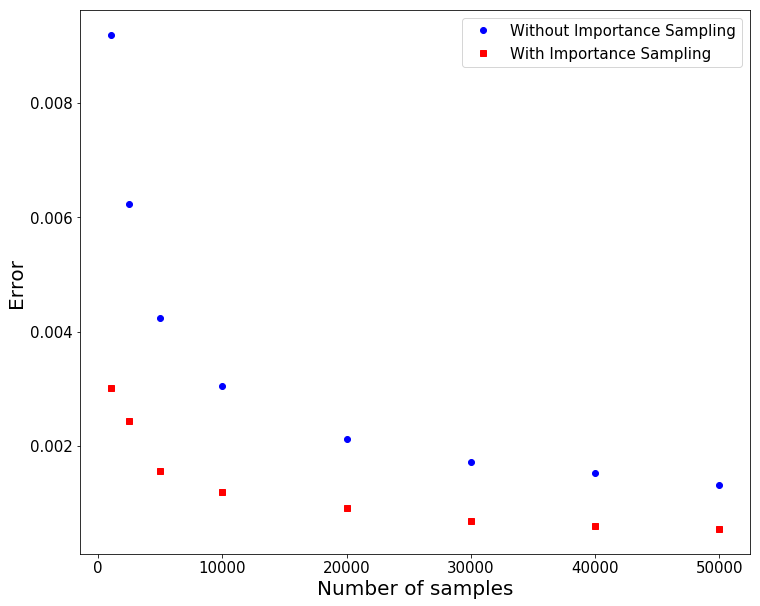

In [21]:
plt.figure(figsize=(12,10))
plt.plot(Ntrial,MCerr1,'bo',label="Without Importance Sampling")
plt.plot(Ntrial,MCerr2,'rs',label="With Importance Sampling")
plt.xlabel("Number of samples")
plt.ylabel("Error")
plt.legend()

In [21]:
# By using importance sampling, the errors have been reduced in this case.

# Multi-dimensional Integral

In [22]:
from skmonaco import mcquad

In [23]:
mintegral = lambda x5: np.sqrt(x5[0]**3+np.sin(.25*x5[1])**2+x5[2]**3*np.cos(10*x5[3])**2)

In [24]:
% time print("Integral =",mcquad(mintegral,xl=[0.,0.,0.,0.],xu=[10.,2*np.pi,10.,np.pi],npoints=1e7))

Integral = (33405.128007662155, 5.893163110601492)
Wall time: 51.9 s


In [25]:
from scipy import integrate

In [26]:
mintegral2 = lambda w,x,y,z: np.sqrt(w**3+np.sin(.25*x)**2+y**3*np.cos(10*z)**2)

In [27]:
% time print("Integral =",integrate.nquad(mintegral2,[[0,10],[0,2*np.pi],[0,10],[0,np.pi]]))

Integral = (33403.350941281016, 0.004147945697529796)
Wall time: 4min 28s


C:\Users\HoT\Anaconda3_2\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
